In [10]:
## Importing libraries for model training.

import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
train1=pd.read_csv('../data/processed/train1_cleaned.txt',sep="\s+",header=None)
print("Shape of 'train_FD001.txt' is: ",train1.shape)

column_names=["engine", "cycle", "setting1", "setting2", "sensor2", "sensor3", "sensor4", "sensor6", "sensor7", "sensor8", "sensor9", "sensor11", "sensor12", "sensor13", "sensor14", "sensor15", "sensor17", "sensor20", "sensor21", "RUL"]
train1.columns=column_names

Shape of 'train_FD001.txt' is:  (20631, 20)


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Symphony\AppData\Local\Temp\ipykernel_6816\855620398.py:1: SyntaxWarning: invalid escape sequence '\s'
  train1=pd.read_csv('../data/processed/train1_cleaned.txt',sep="\s+",header=None)


In [4]:
## Splitting 'train1' Dataframe for model training.

X1=train1.drop(columns=['engine', 'cycle', 'setting1', 'setting2', 'sensor6', 'RUL'])
y1=train1['RUL']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=42)

In [6]:
test_column_names=["engine", "cycle", "setting1", "setting2", "setting3", "sensor1", "sensor2", "sensor3", "sensor4", "sensor5", "sensor6", "sensor7", "sensor8", "sensor9", "sensor10", "sensor11", "sensor12", "sensor13", "sensor14", "sensor15", "sensor16", "sensor17", "sensor18", "sensor19", "sensor20", "sensor21"]

rul1=pd.read_csv("../data/raw/RUL_FD001.txt",header=None, names=["RUL"])
test1=pd.read_csv('../data/raw/test_FD001.txt',sep="\s+",header=None)

test1.columns=test_column_names

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Symphony\AppData\Local\Temp\ipykernel_6816\3449547721.py:4: SyntaxWarning: invalid escape sequence '\s'
  test1=pd.read_csv('../data/raw/test_FD001.txt',sep="\s+",header=None)


In [7]:
## Importing min-max scaler to scale all the train Dataframes.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [8]:
## Defining the function to calculate mse, emse, r2 and mae.

from sklearn.model_selection import cross_val_score

def prediction( model, scaled_test, y_test):
    
    # Make predictions
    y_pred = model.predict(scaled_test)
    
    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred) 
    print("MSE:", mse)
    # MSE measures the average squared difference between actual and predicted values. Lower values are better.
    
    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("RMSE:", rmse)
    # RMSE is the square root of MSE. Measures predictive accuracy in units of the variable. Lower is better.
    
    # R-squared (R2) 
    r2 = r2_score(y_test, y_pred)
    print("R-squared:", r2)
    # R2 measures proportion of variance in actual data explained by the prediction. Values range 0 to 1. Higher is better. 
    
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)  
    print("MAE:", mae)
    # MAE measures average absolute difference between actual and predicted values. Lower values are better.

    return y_pred

In [9]:
## Scaling X_train1 and X_test1

scaled_train1=scaler.fit_transform(X_train1)
scaled_test1=scaler.fit_transform(X_test1)

## Conserve only the last occurence of each unit to match the length of test1

X_valid1 = test1.groupby('engine').last().reset_index().drop(columns=["engine", "cycle", "setting1", "setting2", "setting3"])

X_valid1.drop(columns=['sensor1','sensor5','sensor6','sensor10','sensor16','sensor18','sensor19'], inplace=True)

## scaling X_valid

scaled_X_valid1=scaler.fit_transform(X_valid1)

Text(0.5, 1.0, 'X_train1 Before Scaling')

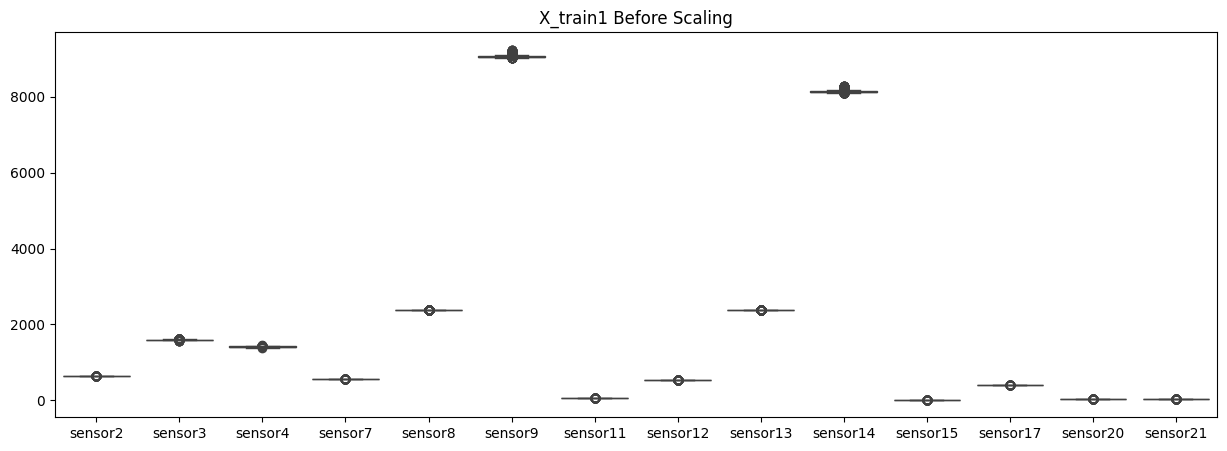

In [11]:
## Boxplots of X_train1 before scaling.

plt.subplots(figsize=(15,5))
sns.boxplot(data=X_train1)
plt.title("X_train1 Before Scaling")

Text(0.5, 1.0, 'X_train1 After Scaling')

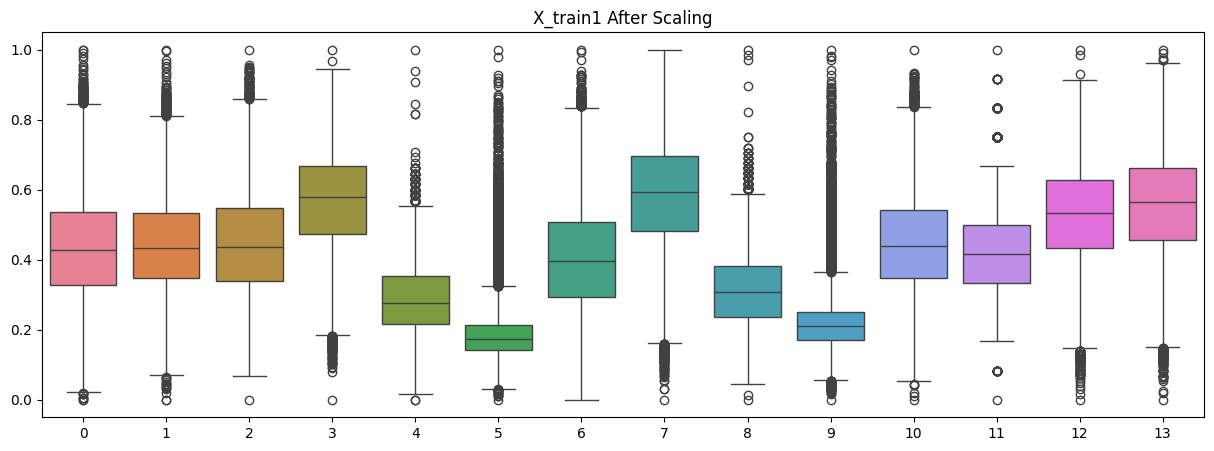

In [12]:
## Boxplots of X_train1 after scaling.

plt.subplots(figsize=(15,5))
sns.boxplot(data=scaled_train1)
plt.title("X_train1 After Scaling")

In [13]:
## Displaying the shapes of FD001.

print(f"X_train1: {X_train1.shape}")
print(f"X_test1: {X_test1.shape}")
print(f"y_train1: {y_train1.shape}")
print(f"y_test1: {y_test1.shape}")
print(f"X_valid1: {X_valid1.shape}")
print(f"y_valid1: {rul1.shape}")

print(f"scaled_train1: {scaled_X_valid1.shape}")
print(f"scaled_test1: {scaled_X_valid1.shape}")
print(f"scaled_X_valid1: {scaled_X_valid1.shape}")

X_train1: (16504, 14)
X_test1: (4127, 14)
y_train1: (16504,)
y_test1: (4127,)
X_valid1: (100, 14)
y_valid1: (100, 1)
scaled_train1: (100, 14)
scaled_test1: (100, 14)
scaled_X_valid1: (100, 14)


Model Training

In [76]:
## Defining function to plot real data and the predicted one to make some comparison.

from matplotlib.pyplot import plot


def plot_predActual(y_test, y_pred):
    plt.figure(figsize=(70,30))
    X_axis = np.arange(len(y_test))
    true_values = np.reshape(y_test.values, (-1,))
    wth = 0.6

    plt.bar(X_axis, y_pred, width=0.5*wth, label = 'Predicted RUL', color='r')
    plt.bar(X_axis, true_values, width=wth, label = 'True RUL', color='b', alpha=0.5)
    plt.legend(prop={'size': 40})
    plt.show()

1. Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(scaled_train1,y_train1)

## predict and evaluate

print(f"Linear-Regression on FD001-test dataset:\n")
prediction(linreg, scaled_test1, y_test1)

print(f"\nLinear-Regression on FD001-train dataset:\n")
prediction(linreg, scaled_train1, y_train1)

print(f"\nLinear-Regression on FD001-validation dataset:\n")
lr_y_pred1=prediction(linreg, scaled_X_valid1, rul1)

lr_rul1=rul1.copy()

Linear-Regression on FD001-test dataset:

MSE: 2041.0287778421055
RMSE: 45.17774648919649
R-squared: 0.5532676072910515
MAE: 34.57645255724177

Linear-Regression on FD001-train dataset:

MSE: 2003.665981566429
RMSE: 44.76232770496223
R-squared: 0.581519462007007
MAE: 34.16144937247055

Linear-Regression on FD001-validation dataset:

MSE: 1919.7485024924952
RMSE: 43.81493469688726
R-squared: -0.11169280094599832
MAE: 34.277147822868116


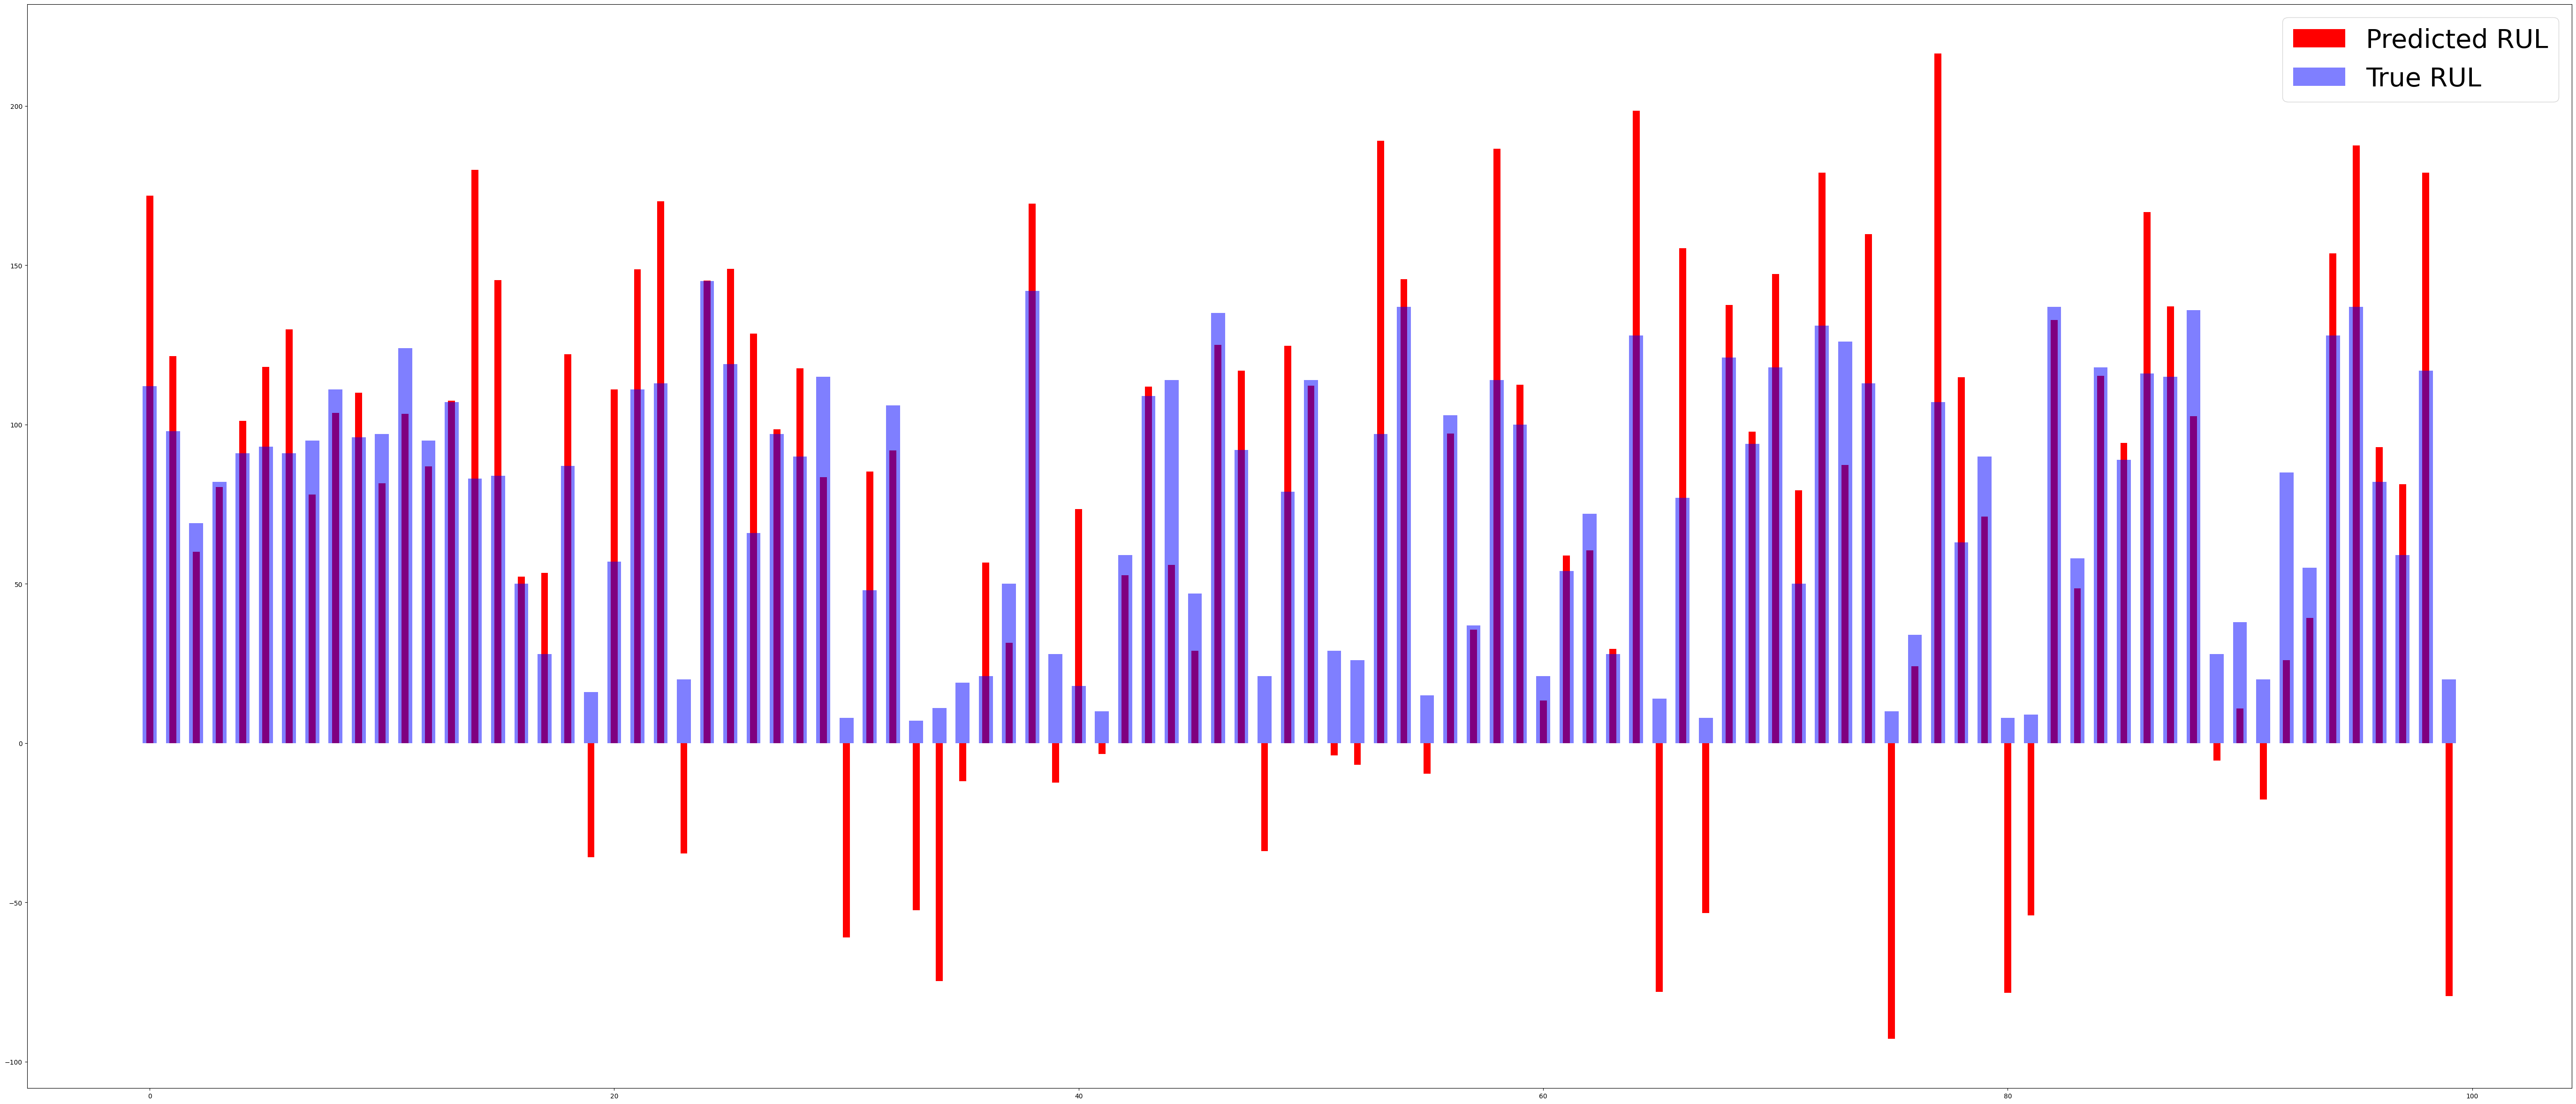

In [77]:
plot_predActual(lr_rul1, lr_y_pred1)

2. Ridge Regeression

In [78]:
## Importing ridgeCV.

from sklearn.linear_model import RidgeCV

ridge = RidgeCV(cv=5)

## Fitting the model.
ridge.fit(scaled_train1, y_train1)

,"alphas alphas: array-like of shape (n_alphas,), default=(0.1, 1.0, 10.0)Array of alpha values to try.Regularization strength; must be a positive float. Regularizationimproves the conditioning of the problem and reduces the variance ofthe estimates. Larger values specify stronger regularization.Alpha corresponds to ``1 / (2C)`` in other linear models such as:class:`~sklearn.linear_model.LogisticRegression` or:class:`~sklearn.svm.LinearSVC`.If using Leave-One-Out cross-validation, alphas must be strictly positive.","(0.1, ...)"
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto false, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"scoring scoring: str, callable, default=NoneThe scoring method to use for cross-validation. Options:- str: see :ref:`scoring_string_names` for options.- callable: a scorer callable object (e.g., function) with signature ``scorer(estimator, X, y)``. See :ref:`scoring_callable` for details.- `None`: negative :ref:`mean squared error ` if cv is None (i.e. when using leave-one-out cross-validation), or :ref:`coefficient of determination ` (:math:`R^2`) otherwise.",None
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the efficient Leave-One-Out cross-validation- integer, to specify the number of folds.- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if ``y`` is binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used, else,:class:`~sklearn.model_selection.KFold` is used.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here.",5
,"gcv_mode gcv_mode: {'auto', 'svd', 'eigen'}, default='auto'Flag indicating which strategy to use when performingLeave-One-Out Cross-Validation. Options are:: 'auto' : use 'svd' if n_samples > n_features, otherwise use 'eigen' 'svd' : force use of singular value decomposition of X when X is dense, eigenvalue decomposition of X^T.X when X is sparse. 'eigen' : force computation via eigendecomposition of X.X^TThe 'auto' mode is the default and is intended to pick the cheaperoption of the two depending on the shape of the training data.",None
,"store_cv_results store_cv_results: bool, default=FalseFlag indicating if the cross-validation values corresponding toeach alpha should be stored in the ``cv_results_`` attribute (seebelow). This flag is only compatible with ``cv=None`` (i.e. usingLeave-One-Out Cross-Validation)... versionchanged:: 1.5 Parameter name changed from `store_cv_values` to `store_cv_results`.",False
,"alpha_per_target alpha_per_target: bool, default=FalseFlag indicating whether to optimize the alpha value (picked from the`alphas` parameter list) for each target separately (for multi-outputsettings: multiple prediction targets). When set to `True`, afterfitting, the `alpha_` attribute will contain a value for each target.When set to `False`, a single alpha is used for all targets... versionadded:: 0.24",False


In [79]:
#ridge.fit(scaled_train1,y_train1)

## predict and evaluate

print(f"Ridge-Regression on FD001-test dataset:\n")
prediction(ridge, scaled_test1, y_test1)

print(f"\nRidge-Regression on FD001-train dataset:\n")
prediction(ridge, scaled_train1, y_train1)

print(f"\nRidge-Regression on FD001-validation dataset:\n")
ridge_y_pred1=prediction(ridge, scaled_X_valid1, rul1)

ridge_rul1=rul1.copy()

Ridge-Regression on FD001-test dataset:

MSE: 2040.4215988670758
RMSE: 45.171026099338015
R-squared: 0.553400504249322
MAE: 34.56565038971058

Ridge-Regression on FD001-train dataset:

MSE: 2003.6827987152758
RMSE: 44.76251555392386
R-squared: 0.5815159496204308
MAE: 34.159727297227455

Ridge-Regression on FD001-validation dataset:

MSE: 1917.8538305804748
RMSE: 43.79330805705907
R-squared: -0.11059562956026037
MAE: 34.27641379599636


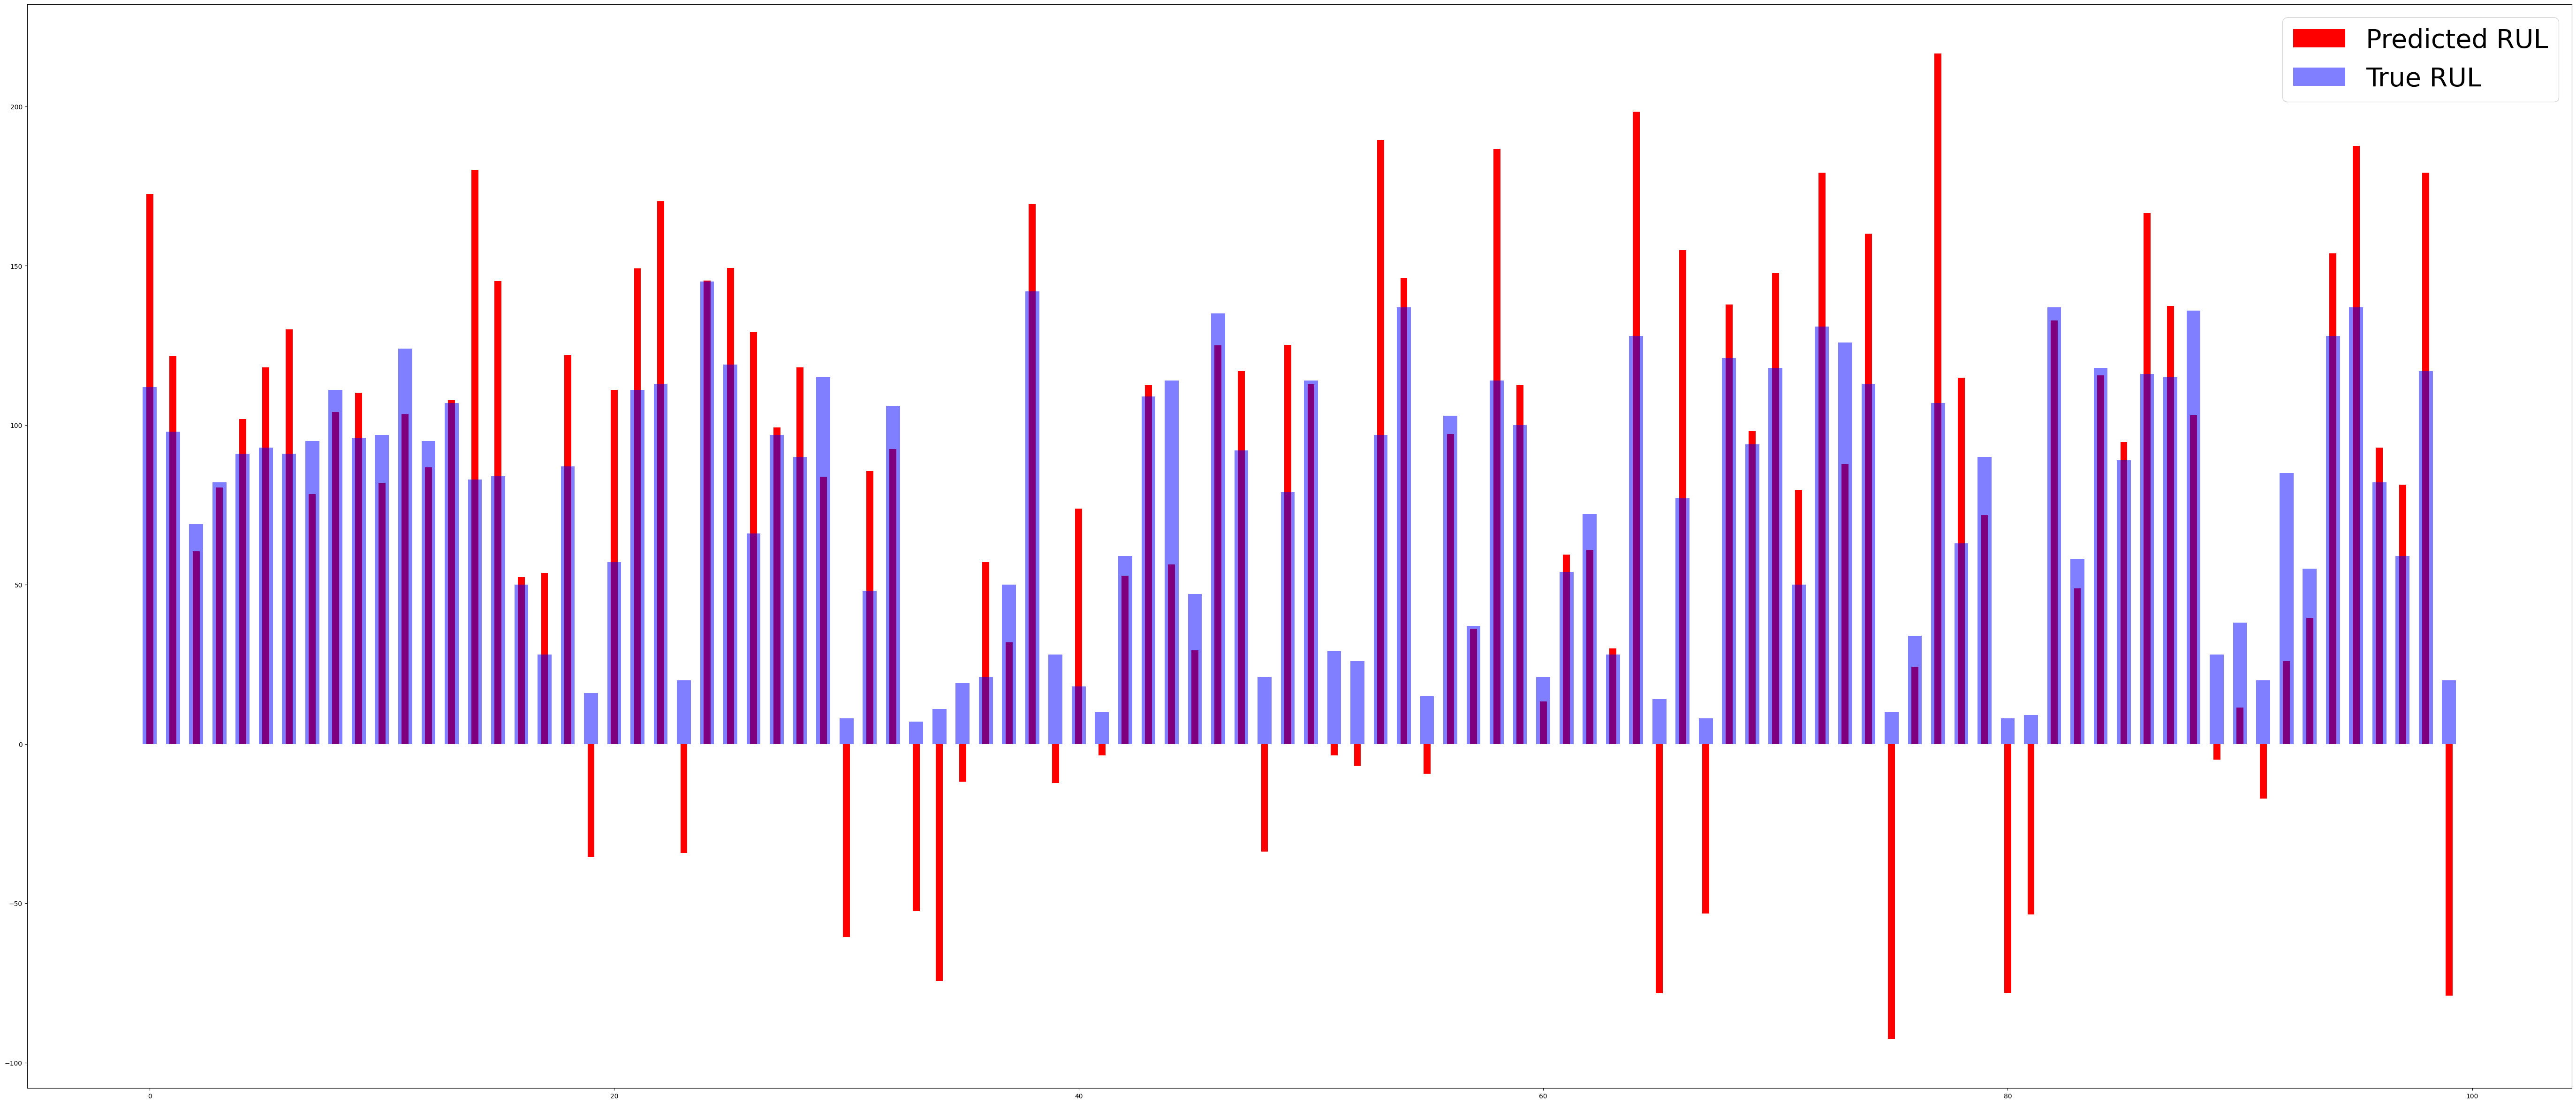

In [80]:
plot_predActual(ridge_rul1, ridge_y_pred1)

3. Lasso Regression

In [81]:
## Importing ridgeCV.

from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5)

## Fitting the model.
lasso.fit(scaled_train1, y_train1)

,"eps eps: float, default=1e-3Length of the path. ``eps=1e-3`` means that``alpha_min / alpha_max = 1e-3``.",0.001
,"n_alphas n_alphas: int, default=100Number of alphas along the regularization path... deprecated:: 1.7 `n_alphas` was deprecated in 1.7 and will be removed in 1.9. Use `alphas` instead.",'deprecated'
,"alphas alphas: array-like or int, default=NoneValues of alphas to test along the regularization path.If int, `alphas` values are generated automatically.If array-like, list of alpha values to use... versionchanged:: 1.7 `alphas` accepts an integer value which removes the need to pass `n_alphas`... deprecated:: 1.7 `alphas=None` was deprecated in 1.7 and will be removed in 1.9, at which point the default value will be set to 100.",'warn'
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto false, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: 'auto', bool or array-like of shape (n_features, n_features), default='auto'Whether to use a precomputed Gram matrix to speed upcalculations. If set to ``'auto'`` let us decide. The Grammatrix can also be passed as argument.",'auto'
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``.",0.0001
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"cv cv: int, cross-validation generator or iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross-validation,- int, to specify the number of folds.- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For int/None inputs, :class:`~sklearn.model_selection.KFold` is used.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: bool or int, default=FalseAmount of verbosity.",False
,"n_jobs n_jobs: int, default=NoneNumber of CPUs to use during the cross validation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


In [82]:
## predict and evaluate

print(f"Lasso-Regression on FD001-test dataset:\n")
prediction(lasso, scaled_test1, y_test1)

print(f"\nLasso-Regression on FD001-train dataset:\n")
prediction(lasso, scaled_train1, y_train1)

print(f"\nLasso-Regression on FD001-validation dataset:\n")
lasso_y_pred1=prediction(lasso, scaled_X_valid1, rul1)

lasso_rul1=rul1.copy()

Lasso-Regression on FD001-test dataset:

MSE: 2035.3986656366583
RMSE: 45.11539277936809
R-squared: 0.5544999042209451
MAE: 34.54670846406279

Lasso-Regression on FD001-train dataset:

MSE: 2003.6890688031783
RMSE: 44.76258559112932
R-squared: 0.5815146400659528
MAE: 34.158976745045614

Lasso-Regression on FD001-validation dataset:

MSE: 1909.7091766228577
RMSE: 43.70021941161003
R-squared: -0.10587920282044339
MAE: 34.16539205529367


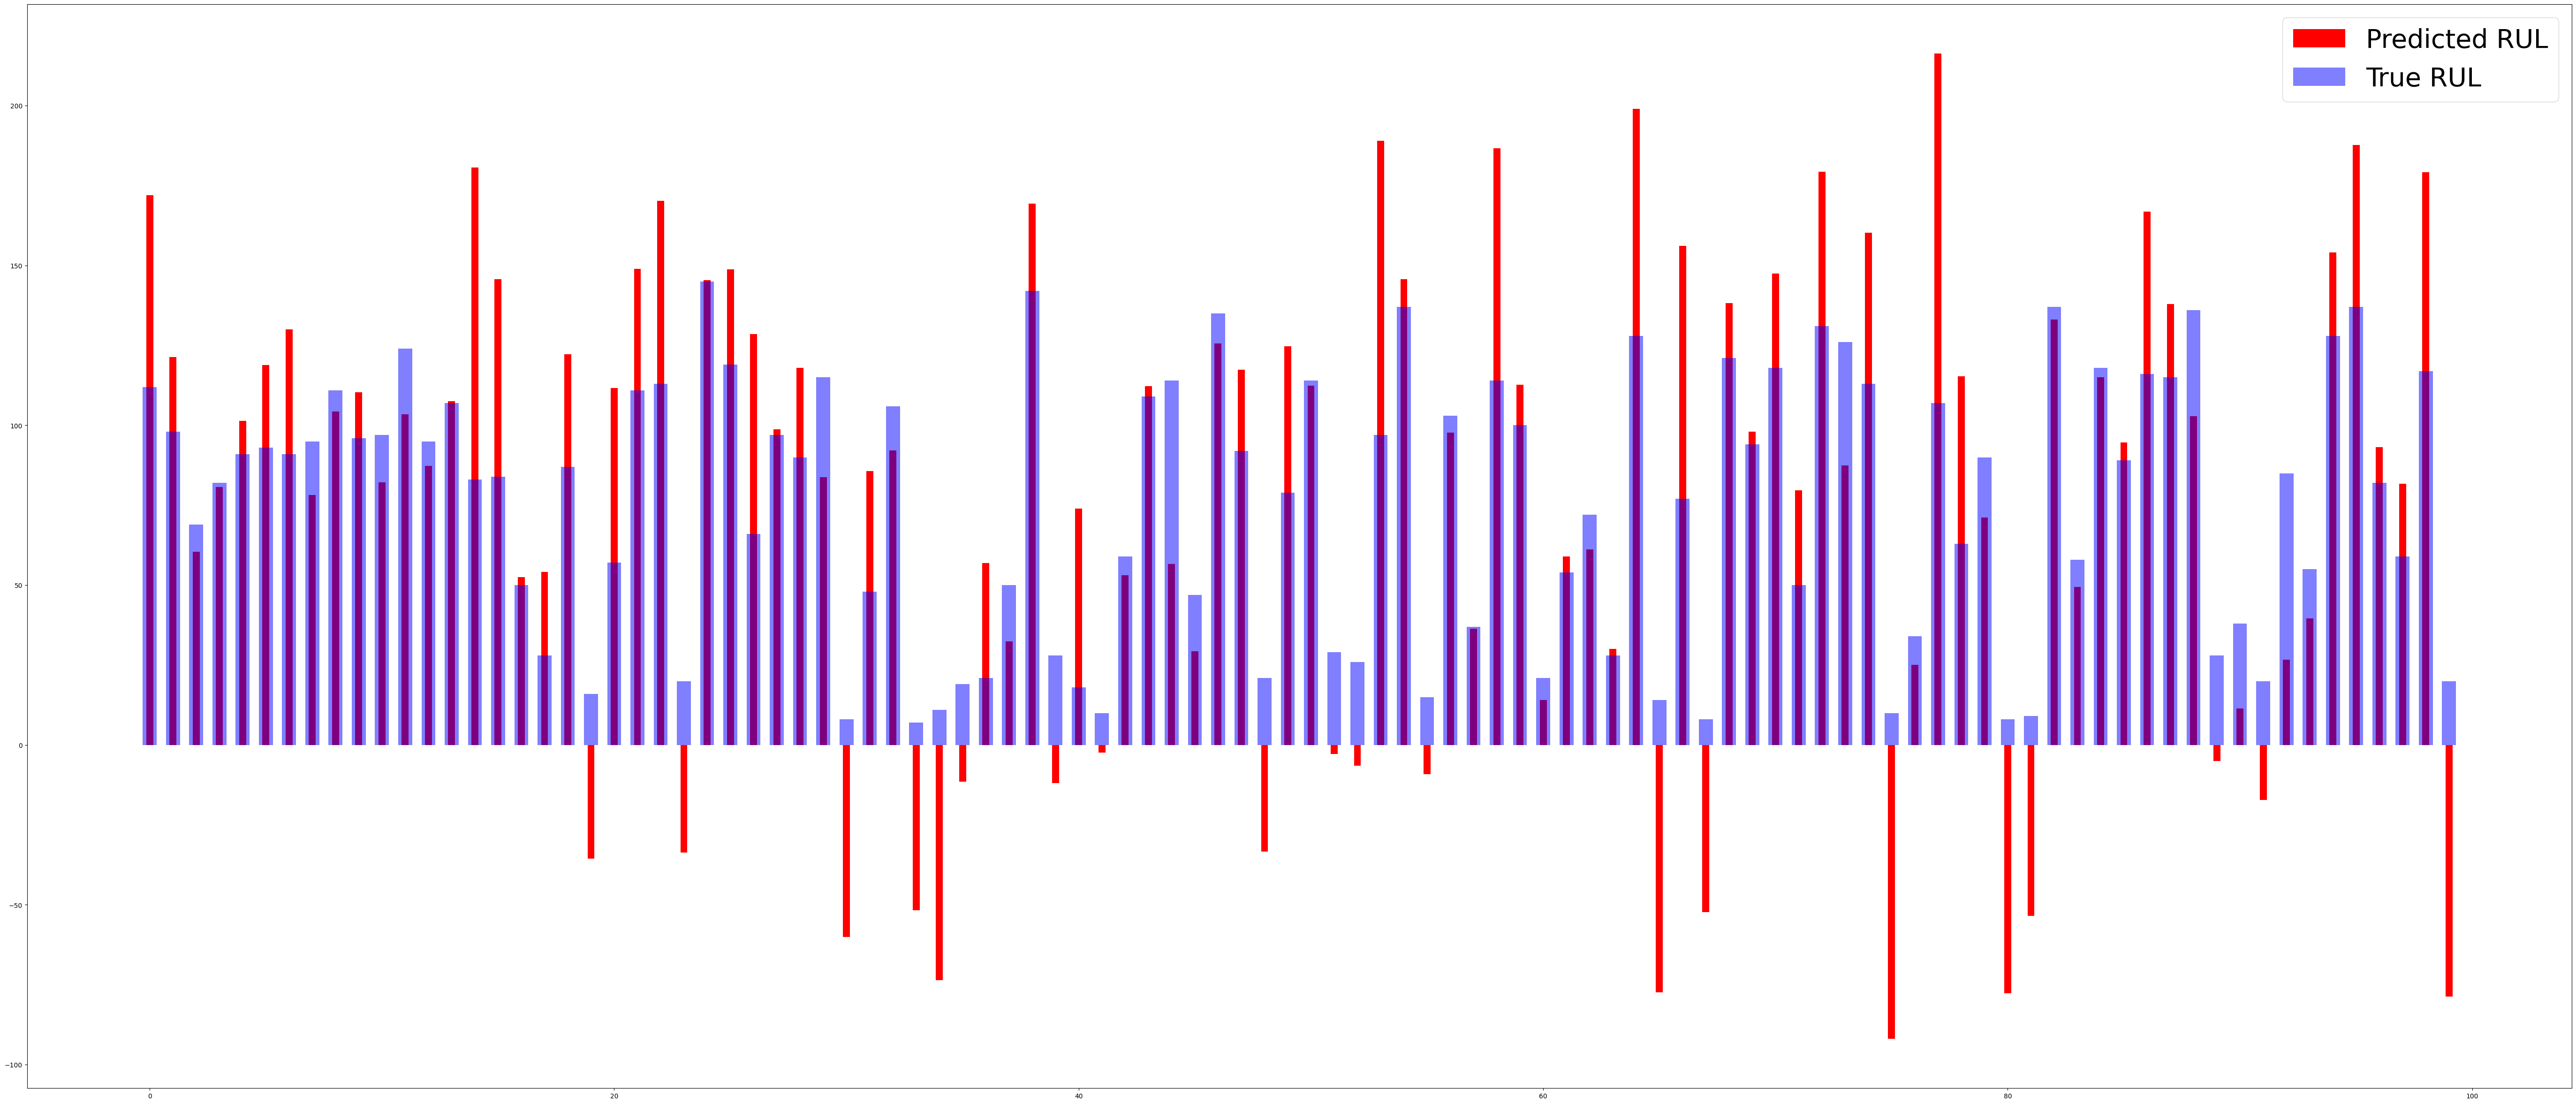

In [83]:
plot_predActual(lasso_rul1, lasso_y_pred1)

4. Random Forest Regressor

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor()
param_grid = {
    'n_estimators': [50,90,120],
    'max_depth' : [8,9,10],
}

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=3)

grid.fit(scaled_train1, y_train1)
print(f"'FD001' : {grid.best_score_ , grid.best_params_}")

'FD001' : (np.float64(0.6403286477345127), {'max_depth': 10, 'n_estimators': 120})


In [85]:
## Fitting the model

rf=RandomForestRegressor(n_estimators=120,  max_depth=10, n_jobs=-1, random_state=42)
rf.fit(scaled_train1, y_train1)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",120
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [86]:
## predict and evaluate

print(f"Random-Forest-Regressor on FD001-test dataset:\n")
prediction(rf, scaled_test1, y_test1)

print(f"\nRandom-Forest-Regressor on FD001-train dataset:\n")
prediction(rf, scaled_train1, y_train1)

print(f"\nRandom-Forest-Regressor on FD001-validation dataset:\n")
rf_y_pred1=prediction(rf, scaled_X_valid1, rul1)

rf_rul1=rul1.copy()

Random-Forest-Regressor on FD001-test dataset:

MSE: 1784.3600787346609
RMSE: 42.24168650438404
R-squared: 0.609446247852401
MAE: 29.828273708727632

Random-Forest-Regressor on FD001-train dataset:

MSE: 1267.0266058695315
RMSE: 35.59531719018011
R-squared: 0.735372072713838
MAE: 24.885232180548396

Random-Forest-Regressor on FD001-validation dataset:

MSE: 1214.9254394808827
RMSE: 34.85578057483267
R-squared: 0.2964579146677415
MAE: 27.32871191490231


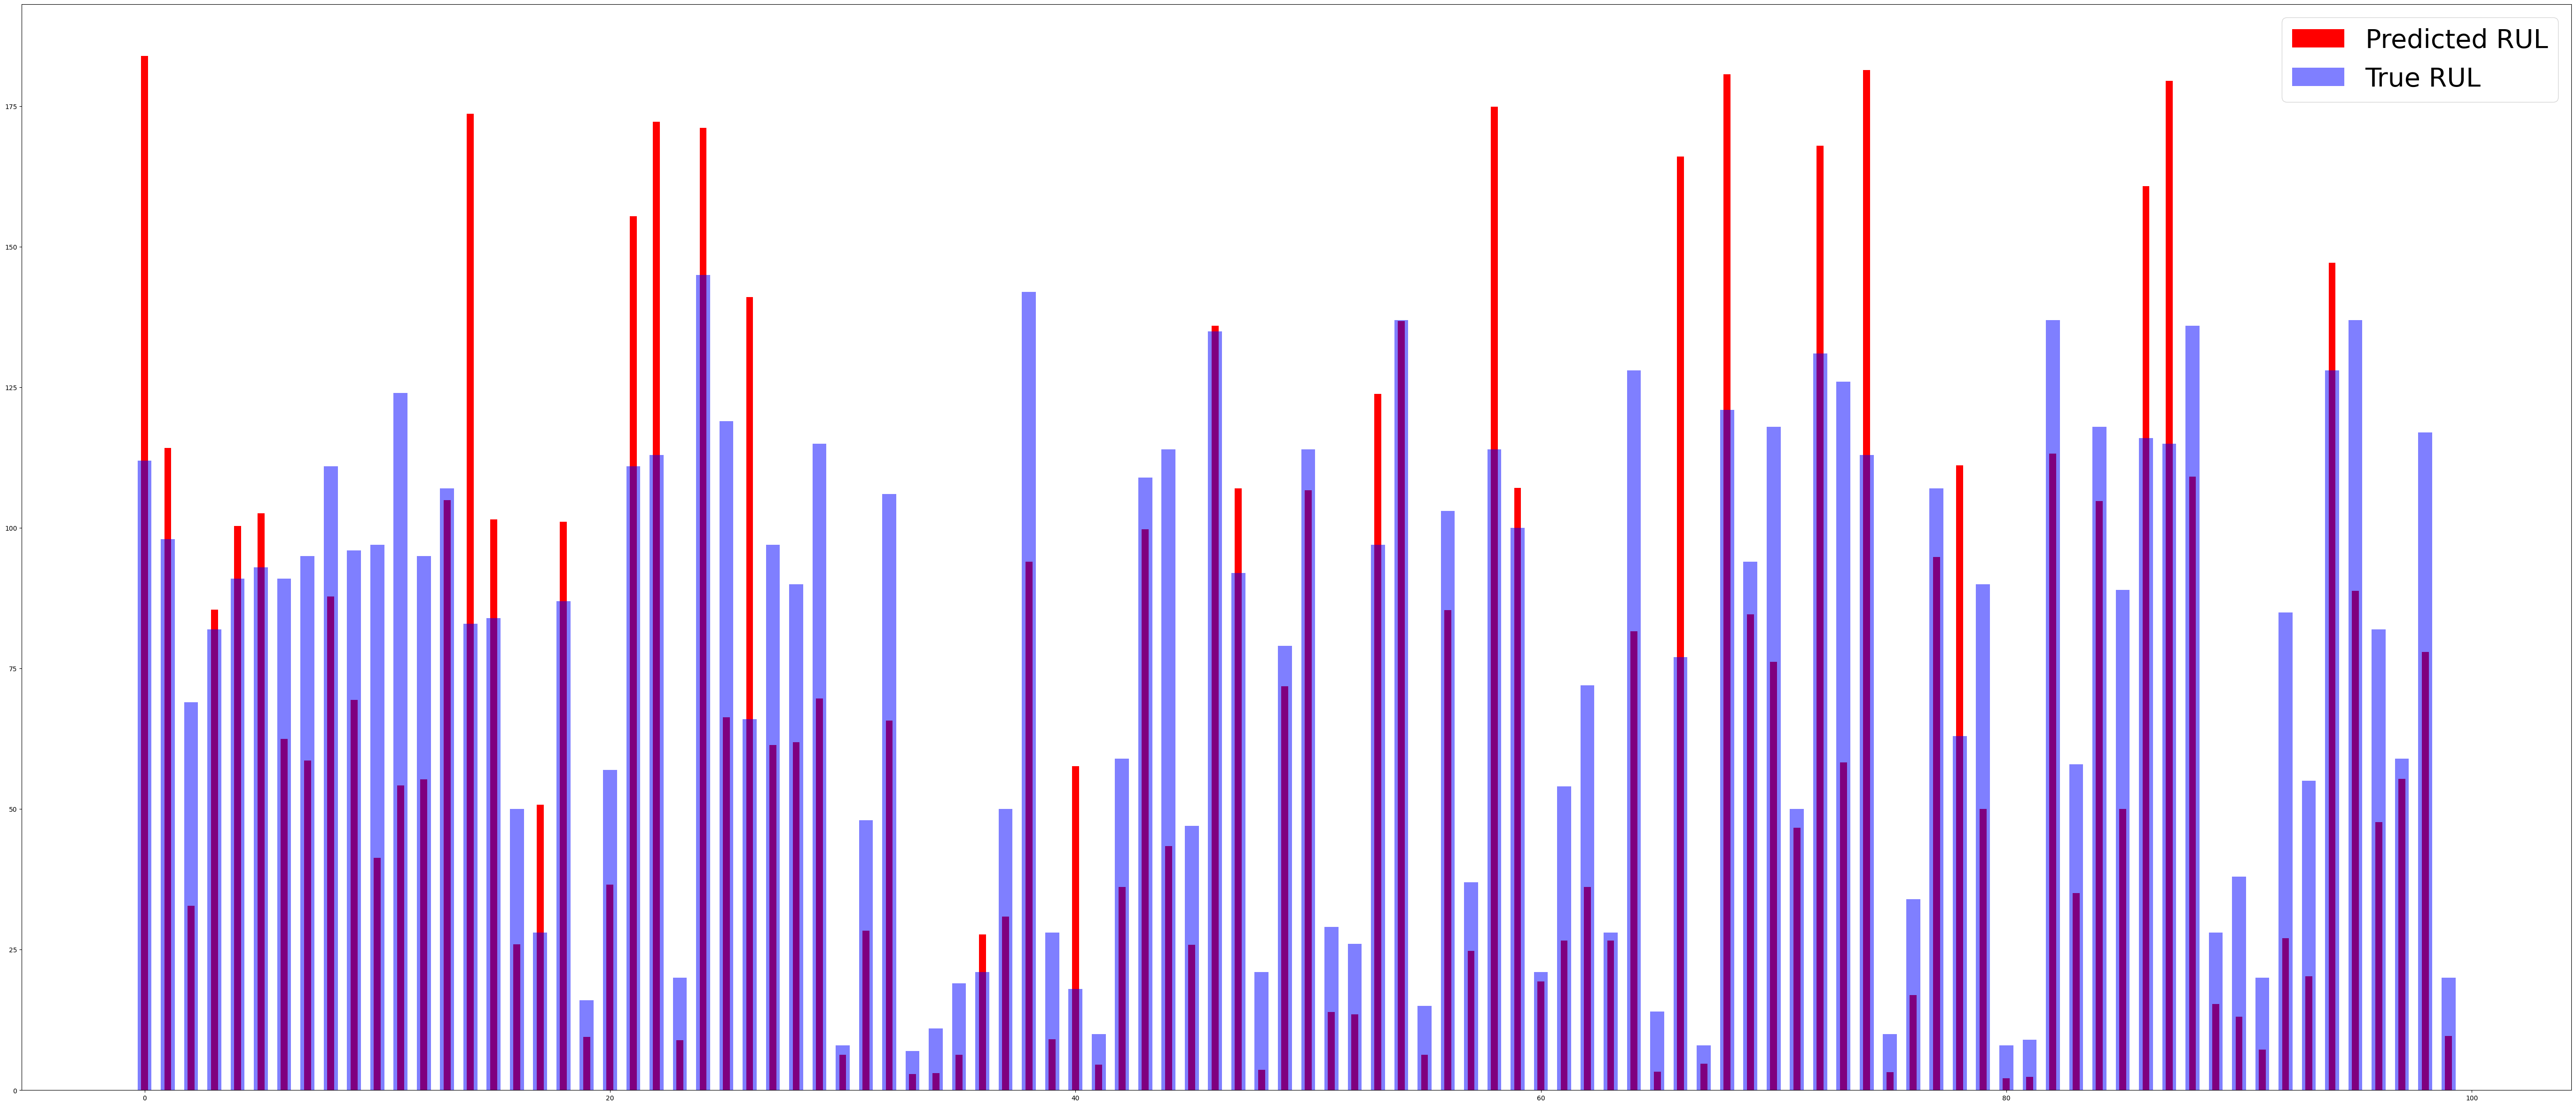

In [87]:
plot_predActual(rf_rul1, rf_y_pred1)

5. Support Vector Regressor

In [88]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf')
svr.fit(scaled_train1, y_train1)

,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm.If none is given, 'rbf' will be used. If a callable is given it isused to precompute the kernel matrix.For an intuitive visualization of different kernel typessee :ref:`sphx_glr_auto_examples_svm_plot_svm_regression.py`",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.The penalty is a squared l2. For an intuitive visualization of theeffects of scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-SVR model. It specifies the epsilon-tubewithin which no penalty is associated in the training loss functionwith points predicted within a distance epsilon from the actualvalue. Must be non-negative.",0.1
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False
,"max_iter max_iter: int, default=-1Hard limit on iterations within solver, or -1 for no limit.",-1


In [89]:
## predict and evaluate

print(f"Support-Vector-Regressor on FD001-test dataset:\n")
prediction(svr, scaled_test1, y_test1)

print(f"\nSupport-Vector-Regressor on FD001-train dataset:\n")
prediction(svr, scaled_train1, y_train1)

print(f"\nSupport-Vector-Regressor on FD001-validation dataset:\n")
svr_y_pred1=prediction(svr, scaled_X_valid1, rul1)

svr_rul1=rul1.copy()

Support-Vector-Regressor on FD001-test dataset:

MSE: 2078.365958984826
RMSE: 45.58909912451469
R-squared: 0.5450953911763283
MAE: 32.11046269923975

Support-Vector-Regressor on FD001-train dataset:

MSE: 1804.8326614733094
RMSE: 42.483322156739455
R-squared: 0.6230472792824451
MAE: 29.509504580602012

Support-Vector-Regressor on FD001-validation dataset:

MSE: 656.2501312254042
RMSE: 25.617379476156497
R-squared: 0.6199770201378237
MAE: 19.617359040085674


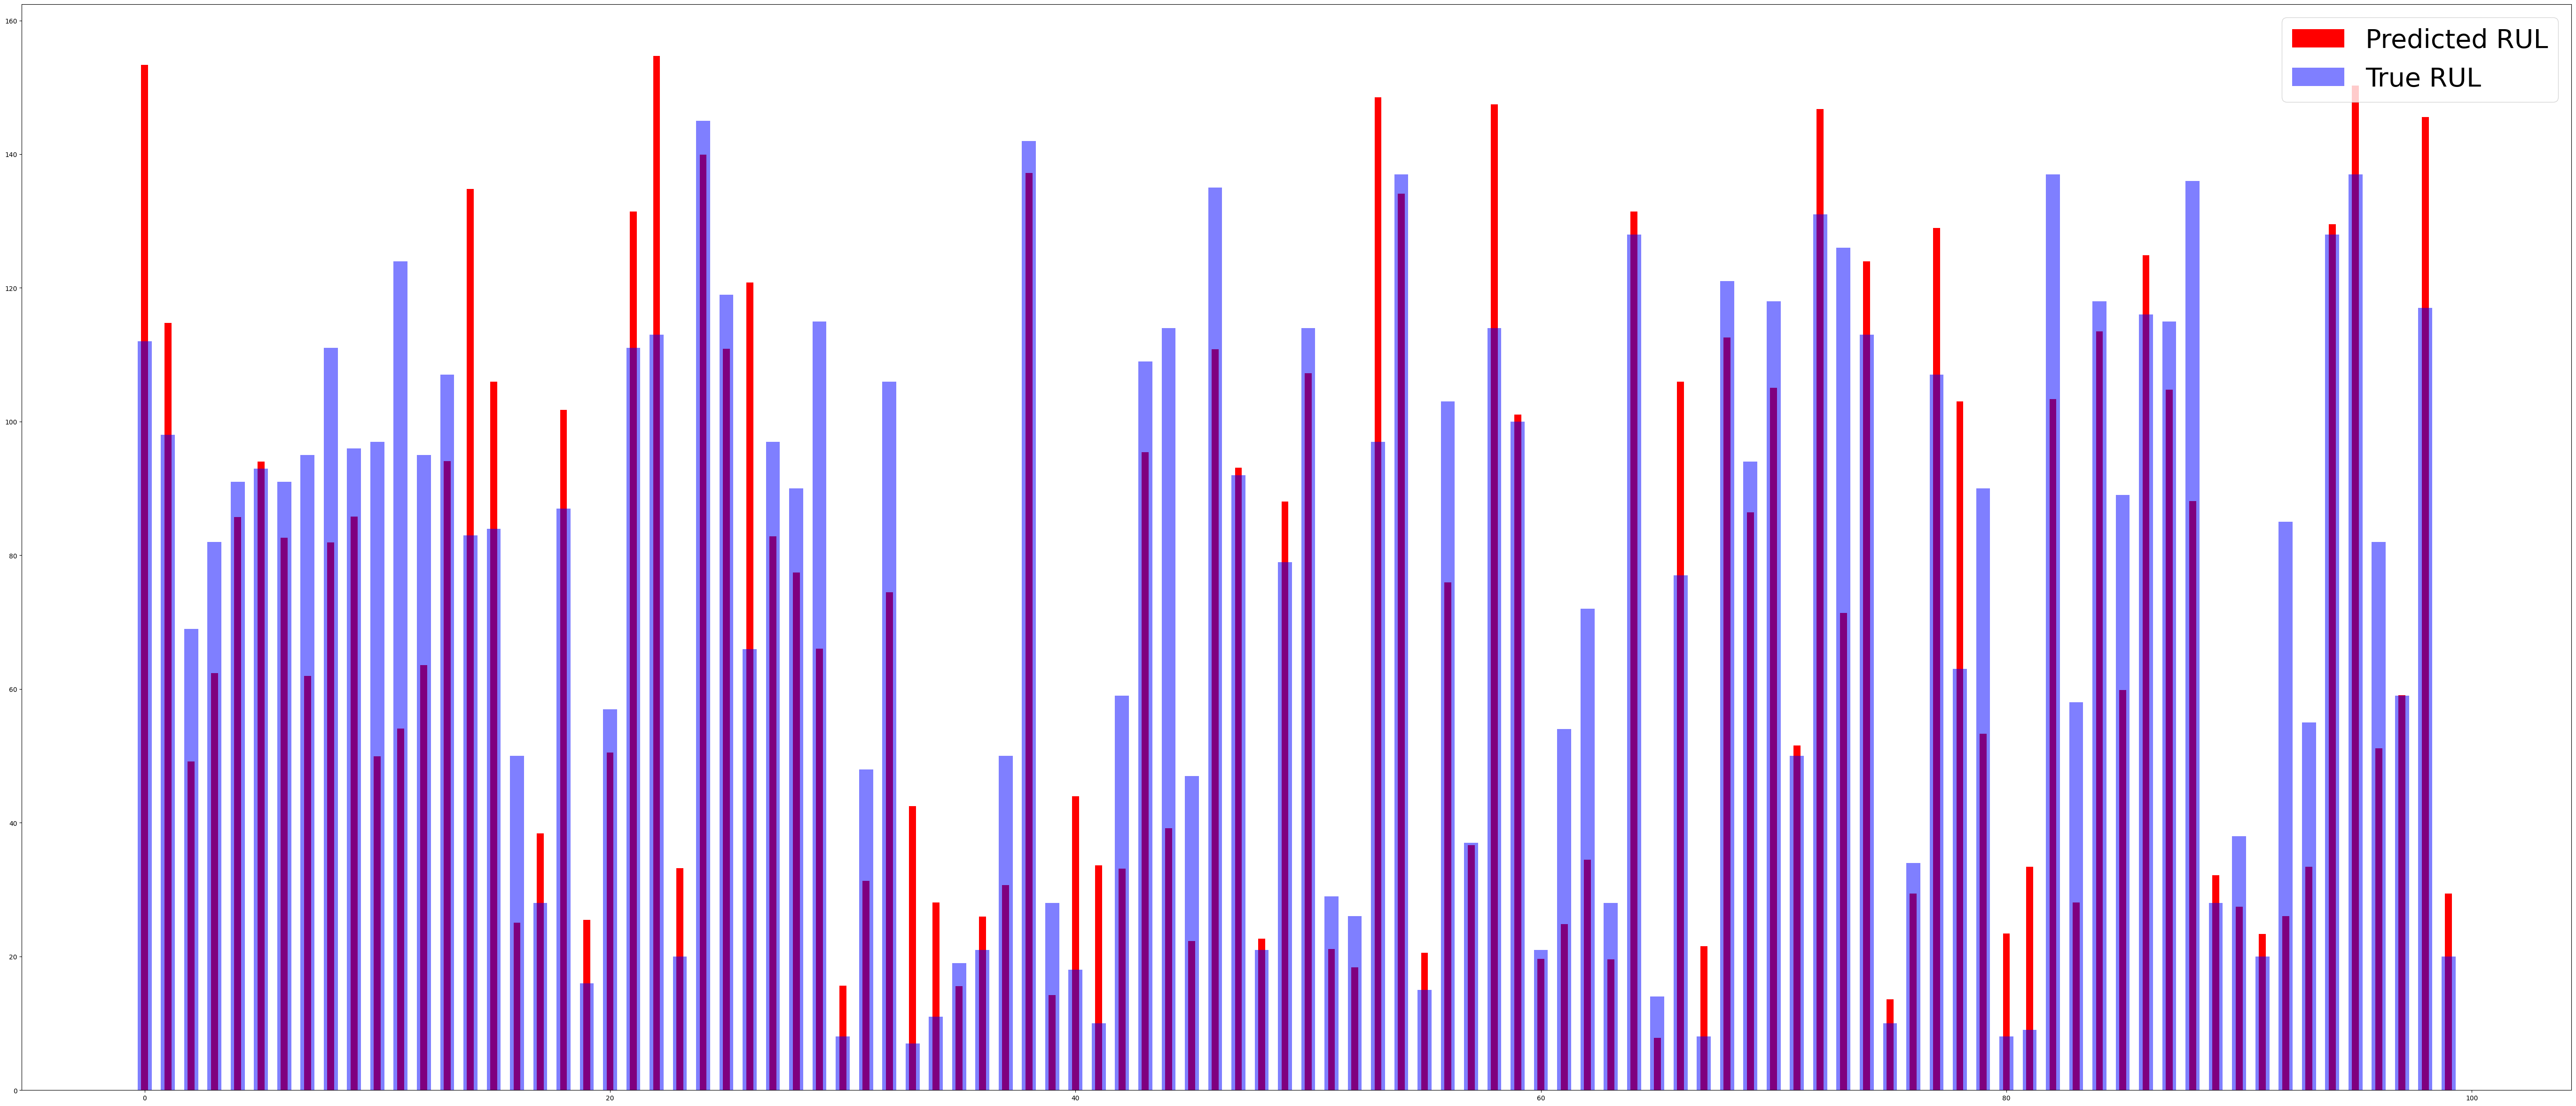

In [90]:
plot_predActual(svr_rul1, svr_y_pred1)

6. XG-Boost Regressor

In [91]:
from xgboost import XGBRegressor
xgbr=XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = 5, alpha = 10, n_estimators = 100)
xgbr.fit(scaled_train1, y_train1)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.3
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [92]:
## predict and evaluate

print(f"XG-Boost-Regressor on FD001-test dataset:\n")
prediction(xgbr, scaled_test1, y_test1)

print(f"\nXG-Boost-Regressor on FD001-train dataset:\n")
prediction(xgbr, scaled_train1, y_train1)

print(f"\nXG-Boost-Regressor on FD001-validation dataset:\n")
xgbr_y_pred1=prediction(xgbr, scaled_X_valid1, rul1)

xgbr_rul1=rul1.copy()

XG-Boost-Regressor on FD001-test dataset:

MSE: 1848.9652099609375
RMSE: 42.99959546275915
R-squared: 0.5953056812286377
MAE: 30.386903762817383

XG-Boost-Regressor on FD001-train dataset:

MSE: 1451.2452392578125
RMSE: 38.09521281286945
R-squared: 0.6968966722488403
MAE: 26.918350219726562

XG-Boost-Regressor on FD001-validation dataset:

MSE: 902.1204833984375
RMSE: 30.035320597563754
R-squared: 0.47759777307510376
MAE: 22.938180923461914


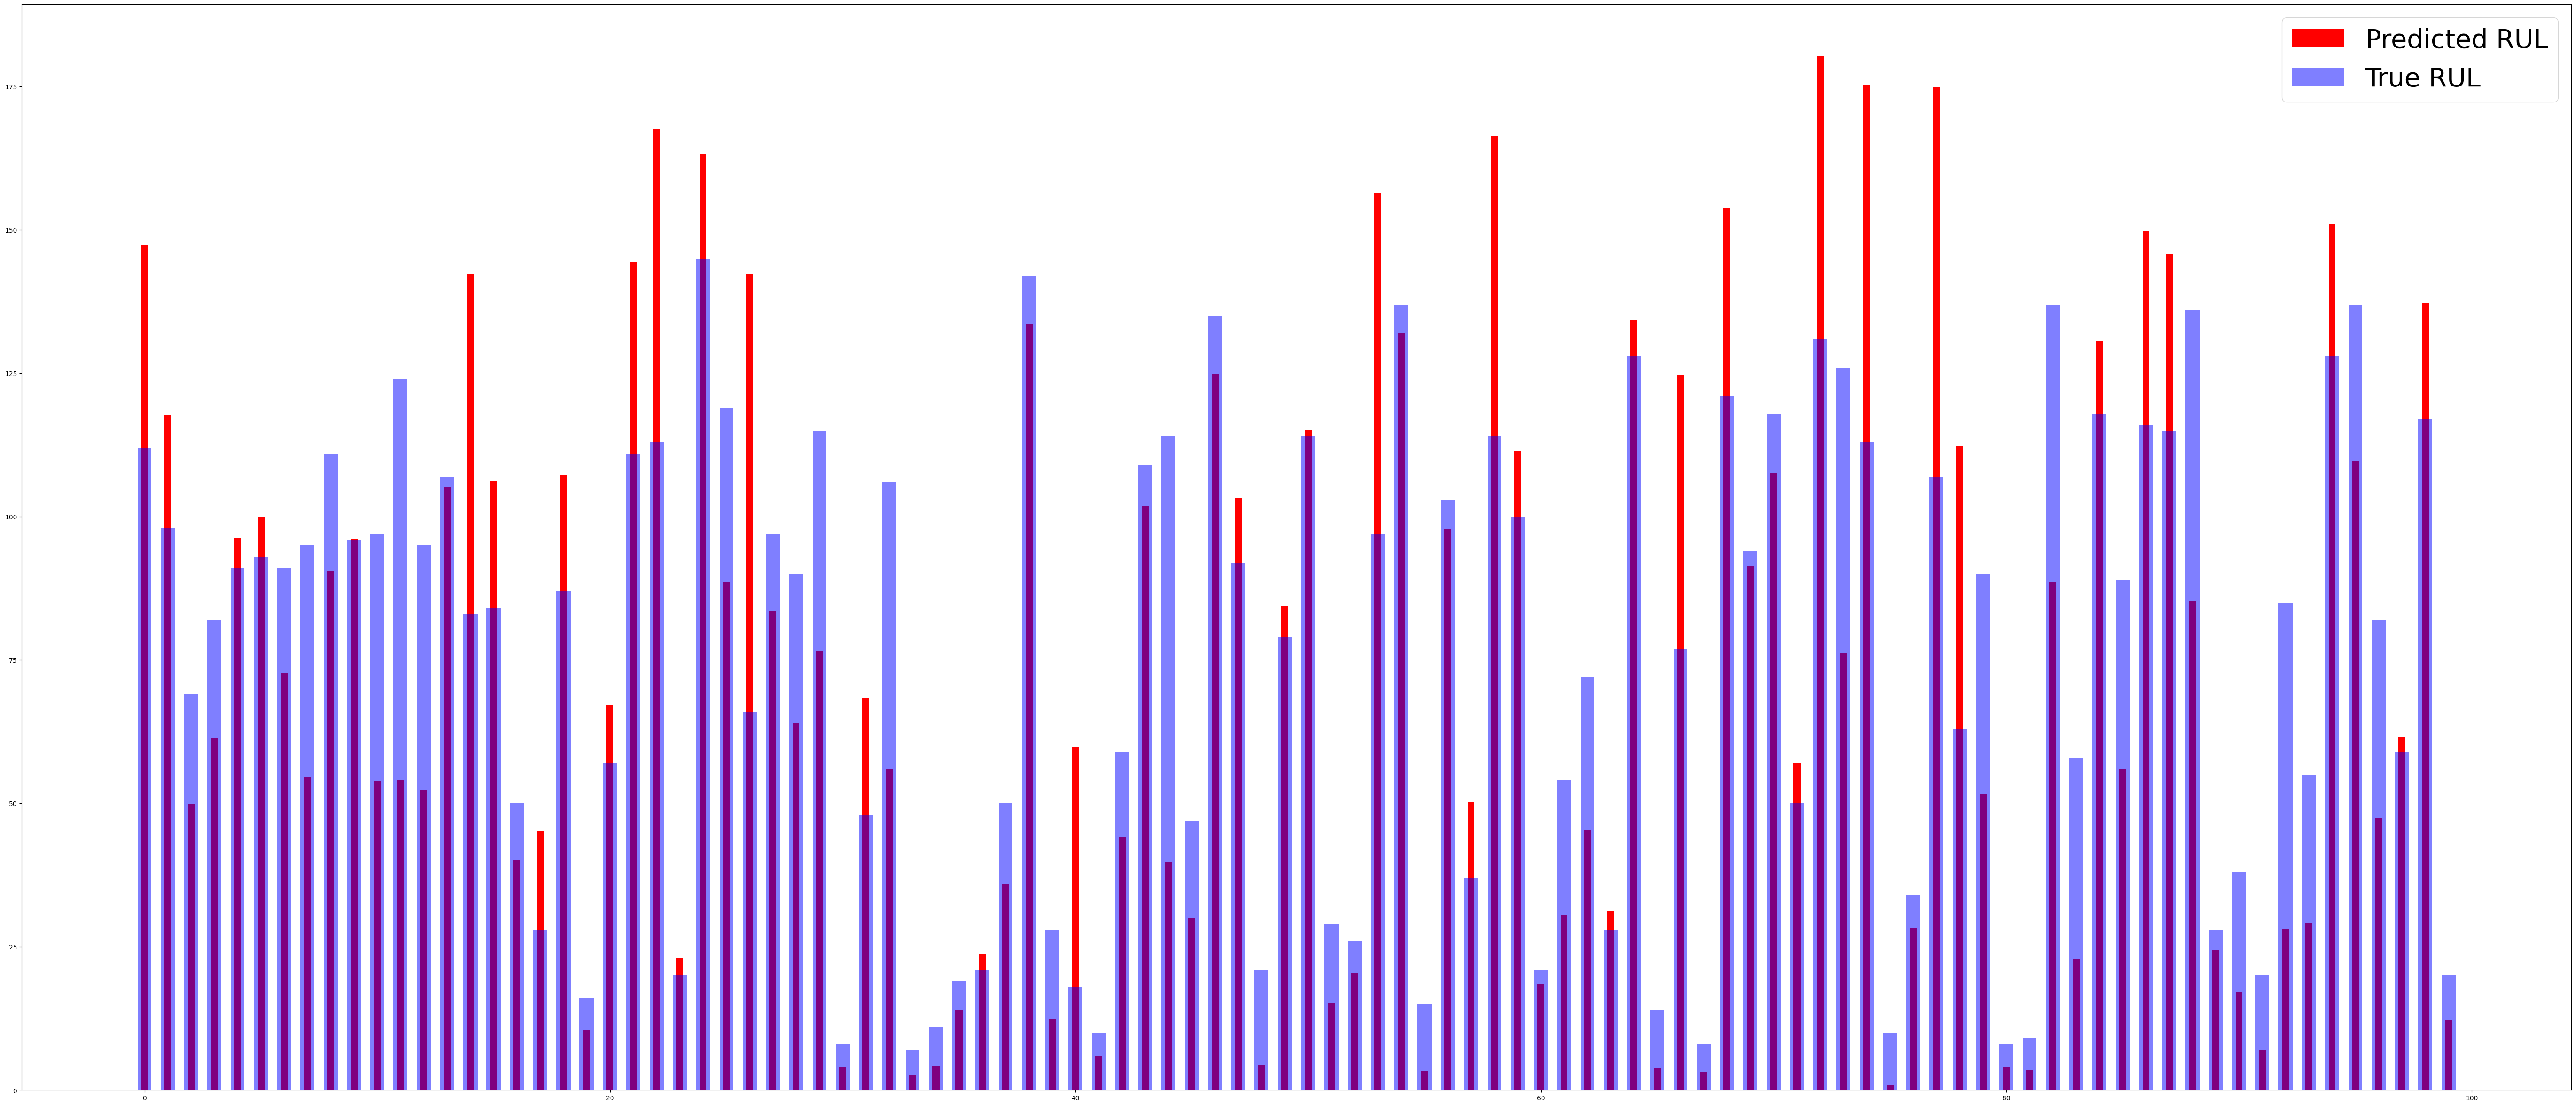

In [93]:
plot_predActual(xgbr_rul1, xgbr_y_pred1)

In [94]:
import pickle
pickle.dump(scaler,open("../models/scaler.pkl","wb"))

pickle.dump(rf,open("../models/random-forest.pkl","wb"))